In [ ]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyforest import *

In [ ]:
df=pd.read_csv(r"/content/credit.csv")

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

## Converting 'object' datatype into categorical variables

In [ ]:
for feature in df.columns:
  if df[feature].dtype=='object':
    df[feature]=pd.Categorical(df[feature])
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [ ]:
df['checking_balance'].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [ ]:
df['credit_history'].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

In [ ]:
df['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [ ]:
df['savings_balance'].value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [ ]:
df['employment_duration'].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [ ]:
df['other_credit'].value_counts()

none     814
bank     139
store     47
Name: other_credit, dtype: int64

In [ ]:
df['housing'].value_counts()

own      713
rent     179
other    108
Name: housing, dtype: int64

In [ ]:
df['job'].value_counts()

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64

In [ ]:
df['phone'].value_counts()

no     596
yes    404
Name: phone, dtype: int64

In [ ]:
df['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [ ]:
ReplaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                "default":     {"no": 0, "yes": 1 } 
                    }


#those features with NO order in their categories                   
OneHotCols=["purpose","housing","other_credit","job"]

In [ ]:
df=df.replace(ReplaceStruct)

In [ ]:
df=pd.get_dummies(df, columns=OneHotCols)

<IPython.core.display.Javascript object>

In [ ]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

## Splitting the Data

In [ ]:
X=df.drop('default', axis=1)
y=df['default']

In [ ]:
X

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1,12,3,1736,1,4,3,4,31,1,...,0,1,0,0,1,0,0,0,0,1
996,1,30,3,3857,1,3,4,4,40,1,...,0,1,0,0,1,0,1,0,0,0
997,-1,12,3,804,1,5,4,4,38,1,...,0,1,0,0,1,0,0,1,0,0
998,1,45,3,1845,1,3,4,4,23,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

## Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTree=DecisionTreeClassifier(criterion='gini',random_state=42)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
DTree.score(X_train,y_train)


1.0

In [ ]:
DTree.score(X_test,y_test)

0.72

## Our Decision Tree is facing the problem of overfitting

## Prunning

In [ ]:
DTreeP=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
DTreeP.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
DTreeP.score(X_train,y_train)

0.74625

In [ ]:
DTreeP.score(X_test,y_test)

0.76

##### Lets have a look at the Important Columns

In [ ]:
pd.DataFrame(DTreeP.feature_importances_, columns=["Imp"], index=X_train.columns)

<IPython.core.display.Javascript object>

,Imp
checking_balance,0.469123
months_loan_duration,0.153373
credit_history,0.132189
amount,0.000000
savings_balance,0.067784
employment_duration,0.000000
percent_of_income,0.000000
years_at_residence,0.000000
age,0.040652
existing_loans_count,0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

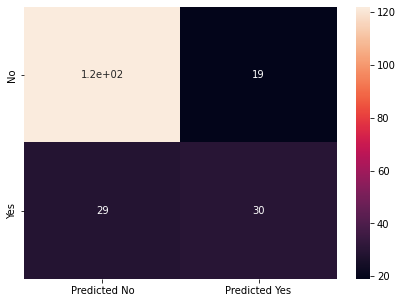

In [ ]:
y_pred=DTreeP.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No","Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Ensemble Learning- Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=DTree, n_estimators=50,random_state=42)
bgcl=bgcl.fit(X_train,y_train)

In [ ]:
y_pred=bgcl.predict(X_test)

In [ ]:
bgcl.score(X_test,y_test)

0.76

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

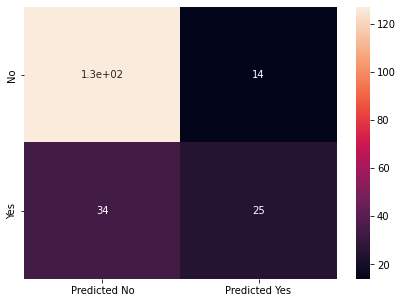

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No","Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Ensemble Technique-AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=10,random_state=42)
abcl=abcl.fit(X_train,y_train)

In [ ]:
y_pred=abcl.predict(X_test)

In [ ]:
abcl.score(X_train,y_train)

0.73

In [ ]:
abcl.score(X_test,y_test)

0.71

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

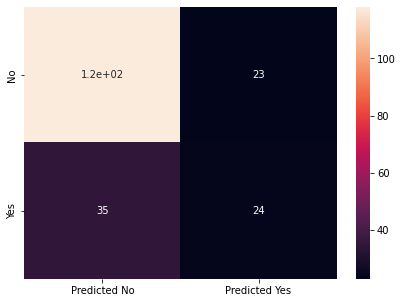

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No","Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Ensemble Technique-Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=50,random_state=42)
gbcl=gbcl.fit(X_train,y_train)

In [ ]:
y_pred=gbcl.predict(X_test)

In [ ]:
gbcl.score(X_train,y_train)

0.8525

In [ ]:
gbcl.score(X_test,y_test)

0.78

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

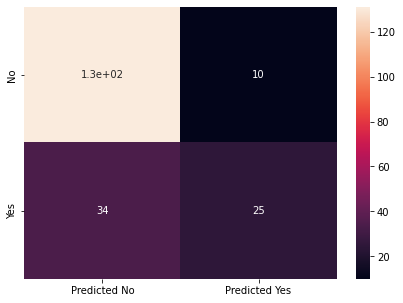

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No","Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Ensemble Technique-XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
y_pred=xgb.predict(X_test)

In [ ]:
xgb.score(X_train,y_train)

0.875

In [ ]:
xgb.score(X_test,y_test)

0.775

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

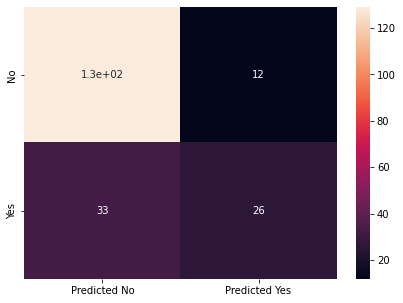

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No","Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

##### You can perform Hyperparamter Tuning to improve the Accuracy Score

## Ensemble Technique-Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50, random_state=42,max_features=12)
rfcl=rfcl.fit(X_train,y_train)

In [ ]:
y_pred=rfcl.predict(X_test)

In [ ]:
rfcl.score(X_test,y_test)

0.78

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

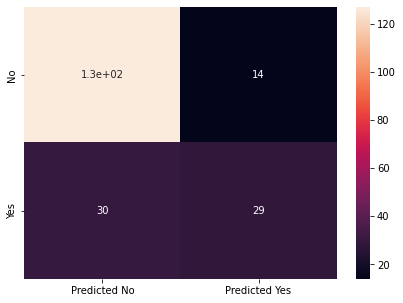

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No","Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)